In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic.csv


In [7]:
import pandas as pd

file_path = '/kaggle/input/titanic/Titanic.csv'
df = pd.read_csv(file_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [13]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [18]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipykernel_30/1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [23]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [27]:
import numpy as np
np.var(df['Sex'])

0.22821808306282676

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6456 - loss: 0.6422 - val_accuracy: 0.6503 - val_loss: 0.5729
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.5727 - val_accuracy: 0.7273 - val_loss: 0.5220
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.5579 - val_accuracy: 0.8252 - val_loss: 0.4823
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.5322 - val_accuracy: 0.8252 - val_loss: 0.4579
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8137 - loss: 0.4823 - val_accuracy: 0.8252 - val_loss: 0.4375
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4599 - val_accuracy: 0.8322 - val_loss: 0.4278
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.4456 - val_accuracy: 0.8182 - val_loss: 0.4211
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8205 - loss: 0.4295 - val_accuracy: 0.8112 - val_loss: 0.4128
Ep

In [29]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [30]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [31]:
model_loaded.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[0.21987705],
       [0.15843648],
       [0.1889267 ],
       [0.85931855],
       [0.73509383],
       [0.9243742 ],
       [0.6473125 ],
       [0.11151721],
       [0.72606355],
       [0.89967453],
       [0.5819992 ],
       [0.0841984 ],
       [0.33810917],
       [0.15191875],
       [0.1429107 ],
       [0.7425856 ],
       [0.39078176],
       [0.7181346 ],
       [0.12970623],
       [0.4468688 ],
       [0.13527842],
       [0.29524353],
       [0.74818754],
       [0.14728867],
       [0.1221531 ],
       [0.11185612],
       [0.231335  ],
       [0.13065216],
       [0.09823388],
       [0.62538743],
       [0.108485  ],
       [0.6437088 ],
       [0.3518391 ],
       [0.59388226],
       [0.15827349],
       [0.15204026],
       [0.5215349 ],
       [0.639875  ],
       [0.8989291 ],
       [0.10100867],
       [0.38441202],
       [0.12043227],
       [0.09567874],
       [0.12440902],
       [0.69231147],
       [0.16817318],
       [0.14852256],
       [0.149

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8222 - loss: 0.4403 - val_accuracy: 0.8112 - val_loss: 0.4019
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4532 - val_accuracy: 0.8322 - val_loss: 0.4005
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8319 - loss: 0.4150 - val_accuracy: 0.8322 - val_loss: 0.3997
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.4228 - val_accuracy: 0.8392 - val_loss: 0.3998
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8206 - loss: 0.4246 - val_accuracy: 0.8392 - val_loss: 0.3986
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.4394 - val_accuracy: 0.8392 - val_loss: 0.3966
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.4238 - val_accuracy: 0.8392 - val_loss: 0.3952
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.3749 - val_accuracy: 0.8392 - val_loss:

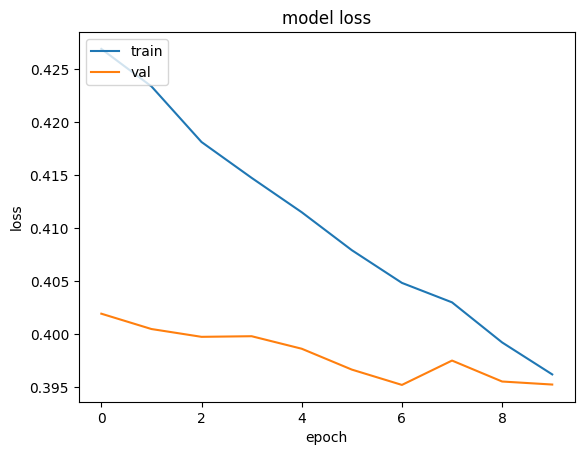

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
missing_values = df.isnull().sum()

missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

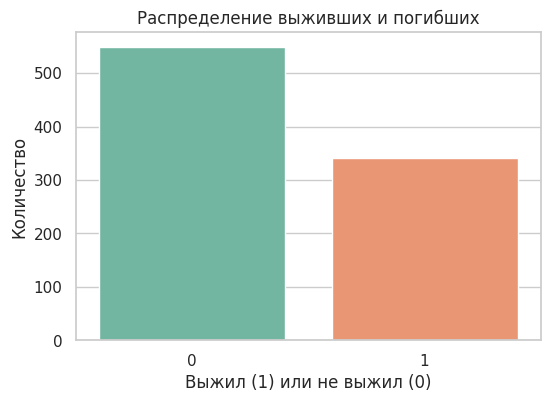

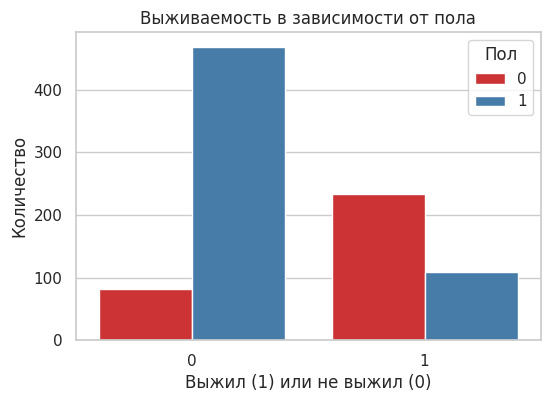

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

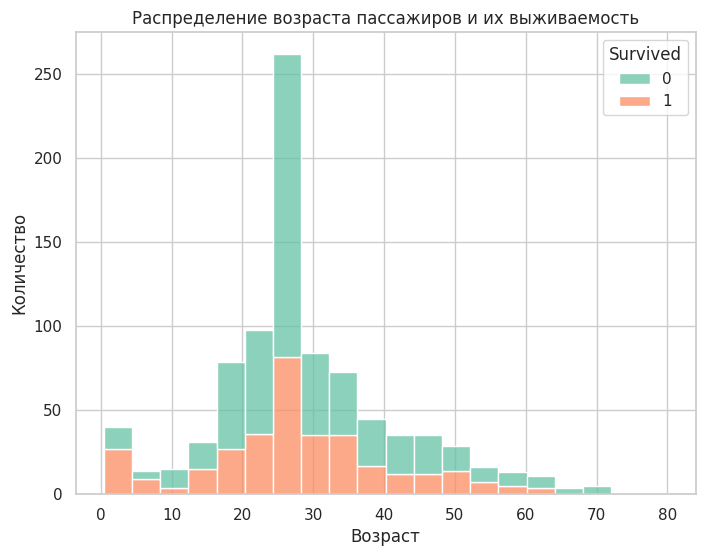

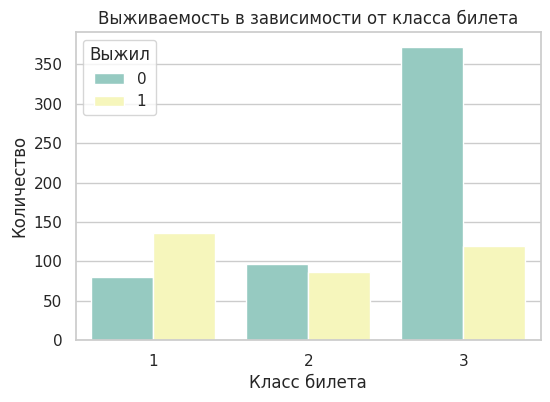

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

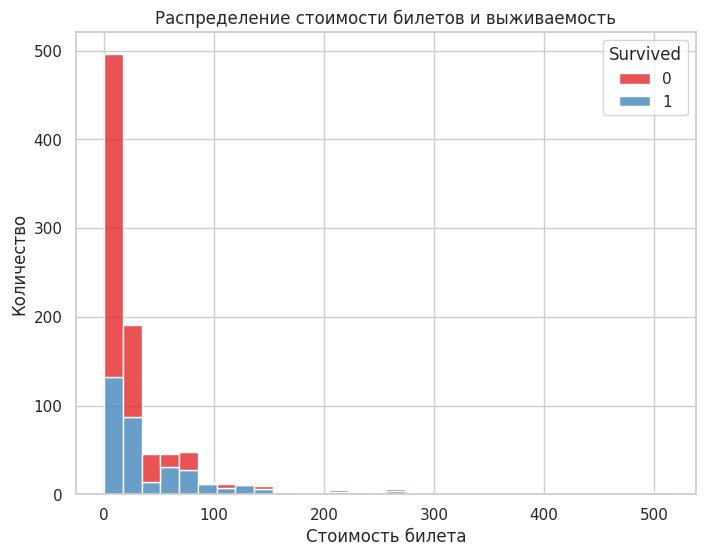

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Распределение выживших и погибших')
plt.xlabel('Выжил (1) или не выжил (0)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Выжил (1) или не выжил (0)')
plt.ylabel('Количество')
plt.legend(title='Пол')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=20)
plt.title('Распределение возраста пассажиров и их выживаемость')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title('Выживаемость в зависимости от класса билета')
plt.xlabel('Класс билета')
plt.ylabel('Количество')
plt.legend(title='Выжил')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', palette='Set1', bins=30)
plt.title('Распределение стоимости билетов и выживаемость')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество')
plt.show()

# Feature Engineering

In [35]:
df['Family_Size'] = df['SibSp'] + df['Parch']

df['Is_Alone'] = (df['Family_Size'] == 0).astype(int)

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()

/tmp/ipykernel_30/2678782113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_30/2678782113.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family_Size,Is_Alone,Sex_1,Embarked_1,Embarked_2,Embarked_3
0,1,0,3,108,22.0,1,0,523,7.2500,1,0,True,False,True,False
1,2,1,1,190,38.0,1,0,596,71.2833,1,0,False,False,False,False
2,3,1,3,353,26.0,0,0,669,7.9250,0,1,False,False,True,False
3,4,1,1,272,35.0,1,0,49,53.1000,1,0,False,False,True,False
4,5,0,3,15,35.0,0,0,472,8.0500,0,1,True,False,True,False


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/titanic/Titanic.csv')

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold = 1
all_confusion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    all_confusion_matrices.append(matrix)
    
    print(f"Fold {fold} Classification Report:\n", report)
    print(f"Fold {fold} Confusion Matrix:\n", matrix)
    fold += 1

final_confusion_matrix = np.sum(all_confusion_matrices, axis=0)
print("\nFinal Confusion Matrix (summed across all folds):\n", final_confusion_matrix)

tn, fp, fn, tp = final_confusion_matrix.ravel()
print(f"Модель предсказала, что пассажир погибнет, но по факту выжил (False Positive) = {fp}")
print(f"Модель предсказала, что пассажир выживет, но по факту погиб (False Negative) = {fn}")
print(f"Модель предсказала, что пассажир выживет, и по факту выжил (True Positive) = {tp}")
print(f"Модель предсказала, что пассажир погибнет, и по факту погиб (True Negative) = {tn}")

print("\nОкончательный вывод о проделанной работе:")
print("В ходе кросс-валидации мы использовали 3 фолда для оценки лучшей модели. На основе суммарной матрицы ошибок:")
print(f"- False Positive (FP): {fp} случаев, где модель ошибочно предсказала, что пассажир погибнет, хотя он выжил.")
print(f"- False Negative (FN): {fn} случаев, где модель ошибочно предсказала, что пассажир выживет, хотя он погиб.")
print(f"- True Positive (TP): {tp} случаев, где модель правильно предсказала выживание.")
print(f"- True Negative (TN): {tn} случаев, где модель правильно предсказала гибель.")
print("Эти результаты показывают, что модель имеет хорошие показатели предсказания класса выживших, но требует улучшения в предсказании погибших.")


Fold 1 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       177
           1       0.84      0.68      0.75       120

    accuracy                           0.82       297
   macro avg       0.82      0.80      0.80       297
weighted avg       0.82      0.82      0.81       297

Fold 1 Confusion Matrix:
 [[162  15]
 [ 39  81]]
Fold 2 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       185
           1       0.80      0.73      0.77       112

    accuracy                           0.83       297
   macro avg       0.83      0.81      0.82       297
weighted avg       0.83      0.83      0.83       297

Fold 2 Confusion Matrix:
 [[165  20]
 [ 30  82]]
Fold 3 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       187
           1       0.77      0.75      0.76   